In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("font", size=13)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
%matplotlib inline

# Classification using Logistic Regression

In [3]:
dfbank = pd.read_csv("bank_promo.csv")

In [4]:
dfbank.head(10)

,job_mgmt,married,ps_edu,hous_loan,pers_loan,priorcontacts,subscribed
0,0,1,0,0,0,1,0
1,0,1,0,1,1,5,0
2,1,0,1,1,0,2,0
3,1,1,1,1,1,4,1
4,0,1,0,1,0,1,0
5,1,0,1,0,0,5,1
6,0,1,1,1,0,3,0
7,0,1,0,1,0,2,1
8,0,1,1,1,0,2,0
9,0,1,0,1,1,3,0


In [5]:
dfbank.tail(10)

,job_mgmt,married,ps_edu,hous_loan,pers_loan,priorcontacts,subscribed
4511,0,1,0,1,0,2,1
4512,0,1,0,1,0,2,0
4513,0,1,0,0,0,2,0
4514,0,1,0,1,0,5,0
4515,0,0,0,1,0,5,0
4516,0,1,0,1,0,5,0
4517,0,1,1,1,1,1,0
4518,0,1,0,0,0,11,0
4519,0,1,0,0,0,7,0
4520,0,0,1,1,1,9,0


In [6]:
dfbank.describe()

,job_mgmt,married,ps_edu,hous_loan,pers_loan,priorcontacts,subscribed
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,0.214333,0.618668,0.298607,0.566025,0.152842,3.336209,0.122539
std,0.410404,0.485767,0.457697,0.495676,0.359875,3.438684,0.327944
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000,1.000000


In [7]:
dfbank.corr(method = 'spearman')

,job_mgmt,married,ps_edu,hous_loan,pers_loan,priorcontacts,subscribed
job_mgmt,1.000000,-0.047153,0.586132,-0.049460,-0.042099,0.047123,0.038234
married,-0.047153,1.000000,-0.107669,0.038432,0.032272,0.017459,-0.057971
ps_edu,0.586132,-0.107669,1.000000,-0.098624,-0.043434,0.036932,0.058327
hous_loan,-0.049460,0.038432,-0.098624,1.000000,0.018451,-0.007962,-0.106946
pers_loan,-0.042099,0.032272,-0.043434,0.018451,1.000000,-0.013742,-0.068750
priorcontacts,0.047123,0.017459,0.036932,-0.007962,-0.013742,1.000000,0.025403
subscribed,0.038234,-0.057971,0.058327,-0.106946,-0.068750,0.025403,1.000000


In [8]:
Bank_DataX = dfbank[['job_mgmt','married','ps_edu','hous_loan','pers_loan', 'priorcontacts']]
Bank_DataY = dfbank[['subscribed']]

### If you want to find overall model fit and significant coefficients

In [9]:
import statsmodels.api as sm
logit_model=sm.Logit(Bank_DataY,sm.add_constant(Bank_DataX))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.361594
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             subscribed   No. Observations:                 4521
Model:                          Logit   Df Residuals:                     4514
Method:                           MLE   Df Model:                            6
Date:                Mon, 24 Oct 2022   Pseudo R-squ.:                 0.02785
Time:                        20:48:04   Log-Likelihood:                -1634.8
converged:                       True   LL-Null:                       -1681.6
Covariance Type:            nonrobust   LLR p-value:                 5.219e-18
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.4784      0.102    -14.533      0.000      -1.678      -1.279
job_mgmt          0.

### To run a predictive logistic regression model

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  
from sklearn import metrics

BankX_train, BankX_test, BankY_train, BankY_test = train_test_split(Bank_DataX, Bank_DataY, test_size=0.3, random_state=0)
bank_logisticreg = LogisticRegression(solver='lbfgs')
bank_logisticreg.fit(BankX_train, np.ravel(BankY_train))

LogisticRegression()

In [11]:
BankY_pred = bank_logisticreg.predict(BankX_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(bank_logisticreg.score(BankX_test, BankY_test)))

Accuracy of logistic regression classifier on test set: 0.87


### Confusion Matrix

A neat description of the Confusion matrix is provided here for those interested:

http://docs.statwing.com/the-confusion-matrix-and-the-precision-recall-tradeoff/

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(BankY_test, BankY_pred)
print(confusion_matrix)

[[1178    0]
 [ 179    0]]


Correct predictions = 1184 + 0 Errors = 173 + 0

1184 / (1184 + 173) = 0.87 (Where did we just see this number?)


#### 'job_mgmt','married','ps_edu','hous_loan','pers_loan', 'priorcontacts'

In [13]:
bank_logisticreg.coef_

array([[ 0.00119879, -0.23987095,  0.36085239, -0.66991047, -0.74562742,
        -0.00801891]])

In [14]:
bank_logisticreg.intercept_

array([-1.54152085])

In [15]:
np.exp(0.13751892) # job_mgmt

1.147423415017716

In [16]:
np.exp(-0.18879348) # married

0.82795747881807

In [17]:
np.exp(0.25229971) #ps_edu

1.2869817007738904

In [18]:
np.exp(-0.66991047) #hous_loan

0.5117543931064039

In [19]:
np.exp(-0.74562742) #pers_loan

0.4744365355668736

In [20]:
np.exp(-0.00801891) #Prior_contacts

0.9920131556909193

# Decision Tree Classification

In [21]:
dfsec = pd.read_csv("secusystem.csv")

In [22]:
dfsec.head()

,IncomeKs,Sqft,SecuritySystemOwner
0,130.50,4743.6,owner
1,117.45,4554.8,owner
2,76.50,4422.0,owner
3,97.20,4341.6,owner
4,111.78,4323.2,owner


In [23]:
dfsec.tail()

,IncomeKs,Sqft,SecuritySystemOwner
43,77.22,2400.0,nonowner
44,74.25,2400.0,nonowner
45,81.90,2220.0,nonowner
46,78.75,2220.0,nonowner
47,63.75,2100.0,nonowner


## Library for displaying decision trees

We will use a library called  plot_tree, which is a part of the matplotlib package


In [24]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

In [25]:
DataX = dfsec[['IncomeKs','Sqft']]
DataY = dfsec[['SecuritySystemOwner']]
dtclf = tree.DecisionTreeClassifier()
dtclf = dtclf.fit(DataX, DataY)

In [26]:
SSO_feature_names = ['IncomeKs', 'Sqft']
SSO_target_names = ['nonowner','owner']

[Text(167.4, 181.2, 'Sqft <= 3181.2\ngini = 0.5\nsamples = 48\nvalue = [24, 24]\nclass = nonowner'),
 Text(83.7, 108.72, 'IncomeKs <= 116.7\ngini = 0.26\nsamples = 26\nvalue = [22, 4]\nclass = nonowner'),
 Text(41.85, 36.23999999999998, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]\nclass = nonowner'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = owner'),
 Text(251.10000000000002, 108.72, 'IncomeKs <= 67.575\ngini = 0.165\nsamples = 22\nvalue = [2, 20]\nclass = owner'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = nonowner'),
 Text(292.95, 36.23999999999998, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]\nclass = owner')]

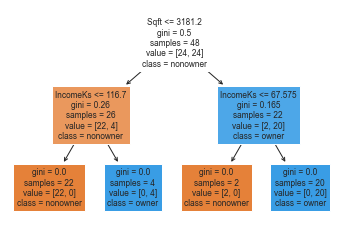

In [27]:
tree.plot_tree(dtclf,
              feature_names=SSO_feature_names,
              class_names=SSO_target_names,
              filled = True)

Here is a nice wikipedia link to Decision Tree - Classification Criteria.. 
https://en.wikipedia.org/wiki/Decision_tree_learning#Metrics

Above we have used "gini" which is the default impurity measure.

### Remember that we did not do the Training and Testing Dataset splits but used the whole dataset....

Now, let us try some prediction task

In [28]:
print(dtclf.predict([[85, 2500]]))

['nonowner']


# k Nearest Neighbor Classification

In [29]:
NNDataX = dfsec[['IncomeKs','Sqft']]
NNDataY = dfsec[['SecuritySystemOwner']]

In [30]:
NNDataX.head()

,IncomeKs,Sqft
0,130.50,4743.6
1,117.45,4554.8
2,76.50,4422.0
3,97.20,4341.6
4,111.78,4323.2


In [31]:
NNDataY.head()

,SecuritySystemOwner
0,owner
1,owner
2,owner
3,owner
4,owner


Note that the IncomeK numbers and Sqft numbers could vary greatly and affect Distance scores abnormally... hence normalizing (using the Min Max method would be good)

In [32]:
normalized_NNDataX=(NNDataX-NNDataX.min())/(NNDataX.max()-NNDataX.min())

In [33]:
normalized_NNDataX.head()

,IncomeKs,Sqft
0,0.720339,1.000000
1,0.615012,0.928582
2,0.284504,0.878348
3,0.451574,0.847935
4,0.569249,0.840974


### Split dataset
Let us split the dataset into training and testing data subsets

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(normalized_NNDataX, NNDataY, test_size=0.5, random_state=1)

Create a Model

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(n_neighbors=7)

Testing the accuracy of the predictions...

In [37]:
knn.score(X_test, y_test)

0.875

In [38]:
Y_pred = knn.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
Confusion_Matrix = confusion_matrix(y_test, Y_pred)
print(Confusion_Matrix)

[[14  1]
 [ 2  7]]


## Correctly Predicted = 14+7 = 21
Wrongly Predicted = 2+1 = 3
### Ratio of
21/(21+3) = 0.875

# Classification using Logistic Regression

In [40]:
dfbank = pd.read_csv("bank_promo.csv")

In [41]:
dfbank.head()

,job_mgmt,married,ps_edu,hous_loan,pers_loan,priorcontacts,subscribed
0,0,1,0,0,0,1,0
1,0,1,0,1,1,5,0
2,1,0,1,1,0,2,0
3,1,1,1,1,1,4,1
4,0,1,0,1,0,1,0


In [42]:
dfbank.tail()

,job_mgmt,married,ps_edu,hous_loan,pers_loan,priorcontacts,subscribed
4516,0,1,0,1,0,5,0
4517,0,1,1,1,1,1,0
4518,0,1,0,0,0,11,0
4519,0,1,0,0,0,7,0
4520,0,0,1,1,1,9,0


In [43]:
dfbank.describe()

,job_mgmt,married,ps_edu,hous_loan,pers_loan,priorcontacts,subscribed
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,0.214333,0.618668,0.298607,0.566025,0.152842,3.336209,0.122539
std,0.410404,0.485767,0.457697,0.495676,0.359875,3.438684,0.327944
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000,1.000000


In [44]:
dfbank.corr()

,job_mgmt,married,ps_edu,hous_loan,pers_loan,priorcontacts,subscribed
job_mgmt,1.000000,-0.047153,0.586132,-0.049460,-0.042099,0.028252,0.038234
married,-0.047153,1.000000,-0.107669,0.038432,0.032272,0.011208,-0.057971
ps_edu,0.586132,-0.107669,1.000000,-0.098624,-0.043434,0.033753,0.058327
hous_loan,-0.049460,0.038432,-0.098624,1.000000,0.018451,0.015789,-0.106946
pers_loan,-0.042099,0.032272,-0.043434,0.018451,1.000000,0.004591,-0.068750
priorcontacts,0.028252,0.011208,0.033753,0.015789,0.004591,1.000000,-0.003190
subscribed,0.038234,-0.057971,0.058327,-0.106946,-0.068750,-0.003190,1.000000


In [45]:
Bank_DataX = dfbank[['job_mgmt','married','ps_edu','hous_loan','pers_loan', 'priorcontacts']]
Bank_DataY = dfbank[['subscribed']]

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  
from sklearn import metrics

BankX_train, BankX_test, BankY_train, BankY_test = train_test_split(Bank_DataX, Bank_DataY, test_size=0.3, random_state=0)
bank_logisticreg = LogisticRegression(solver='lbfgs')
bank_logisticreg.fit(BankX_train, np.ravel(BankY_train))

LogisticRegression()

In [47]:
BankY_pred = bank_logisticreg.predict(BankX_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(bank_logisticreg.score(BankX_test, BankY_test)))

Accuracy of logistic regression classifier on test set: 0.87


### Confusion Matrix

A neat description of the Confusion matrix is provided here for those interested:

http://docs.statwing.com/the-confusion-matrix-and-the-precision-recall-tradeoff/

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(BankY_test, BankY_pred)
print(confusion_matrix)

[[1178    0]
 [ 179    0]]


Correct predictions = 1178 + 0 Errors = 179 + 0

1178 / (1178 + 179) = 0.87 (Where did we just see this number?)


#### 'job_mgmt','married','ps_edu','hous_loan','pers_loan', 'priorcontacts'

In [49]:
bank_logisticreg.coef_

array([[ 0.00119879, -0.23987095,  0.36085239, -0.66991047, -0.74562742,
        -0.00801891]])

In [50]:
bank_logisticreg.intercept_

array([-1.54152085])

In [51]:
np.exp(0.00119879) # job_mgmt

1.0011995088359478

In [52]:
np.exp(-0.23987095) # married

0.7867293819425176

In [53]:
np.exp(0.36085239) #ps_edu

1.4345516910741505

In [54]:
np.exp(-0.66991047) #hous_loan

0.5117543931064039

In [55]:
np.exp(-0.74562742) #pers_loan

0.4744365355668736

In [56]:
np.exp(-0.00801891) #Prior_contacts

0.9920131556909193

# Naive Bayes Classification

More information on the BernoulliNB Naive Bayes classifier:
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html

In [57]:
NBDataX = dfbank[['job_mgmt','married','ps_edu','hous_loan','pers_loan','priorcontacts']]
NBDataY = dfbank[['subscribed']]

In [58]:
NBX_train, NBX_test, NBY_train, NBY_test = train_test_split(NBDataX, NBDataY, test_size=0.4, random_state=42)

In [59]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

In [60]:
#Create a Classifier and Train the model
BERNmodel = BernoulliNB()
#GAUSSmodel = GaussianNB()

# If the other variables were continuous, I would use GaussianNB()
BERNmodel.fit(NBX_train, np.ravel(NBY_train))
#GAUSSmodel.fit(NBX_train, np.ravel(NBY_train))

BernoulliNB()

In [61]:
from sklearn.metrics import confusion_matrix

#Predict Bernoulli Output 
NBERNY_pred = BERNmodel.predict(NBX_test)
#NGaussY_pred = GAUSSmodel.predict(NBX_test)

NBERNConfusion_Matrix = confusion_matrix(NBY_test, NBERNY_pred)
#NGaussConfusion_Matrix = confusion_matrix(NBY_test, NGaussY_pred)

print(NBERNConfusion_Matrix)
#print(NGaussConfusion_Matrix)

[[1609    0]
 [ 200    0]]


In [62]:
BERNmodel.score(NBX_test, NBY_test)
#GAUSSmodel.score(NBX_test, NBY_test)

0.8894416804864566

In [65]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

In [66]:
DTDataX = dfbank[['job_mgmt','married','ps_edu','hous_loan','pers_loan','priorcontacts']]
DTDataY = dfbank[['subscribed']]

dtclf2 = tree.DecisionTreeClassifier()
dtclf2 = dtclf2.fit(DTDataX, DTDataY)

In [67]:
BPromo_feature_names = ['job_mgmt','married','ps_edu','hous_loan','pers_loan','priorcontacts']
BPromo_target_names = ['NotSub','Sub']

[Text(169.92170668761221, 210.645, 'hous_loan <= 0.5\ngini = 0.215\nsamples = 4521\nvalue = [3967, 554]\nclass = NotSub'),
 Text(92.9039946140036, 197.055, 'pers_loan <= 0.5\ngini = 0.272\nsamples = 1962\nvalue = [1643, 319]\nclass = NotSub'),
 Text(46.80888689407541, 183.465, 'married <= 0.5\ngini = 0.292\nsamples = 1677\nvalue = [1379, 298]\nclass = NotSub'),
 Text(19.760412926391385, 169.875, 'priorcontacts <= 15.0\ngini = 0.329\nsamples = 678\nvalue = [537, 141]\nclass = NotSub'),
 Text(18.55825852782765, 156.285, 'ps_edu <= 0.5\ngini = 0.333\nsamples = 669\nvalue = [528, 141]\nclass = NotSub'),
 Text(9.016157989228008, 142.695, 'priorcontacts <= 2.5\ngini = 0.315\nsamples = 388\nvalue = [312, 76]\nclass = NotSub'),
 Text(4.808617594254938, 129.10500000000002, 'job_mgmt <= 0.5\ngini = 0.334\nsamples = 241\nvalue = [190, 51]\nclass = NotSub'),
 Text(2.404308797127469, 115.515, 'priorcontacts <= 1.5\ngini = 0.328\nsamples = 227\nvalue = [180, 47]\nclass = NotSub'),
 Text(1.2021543985

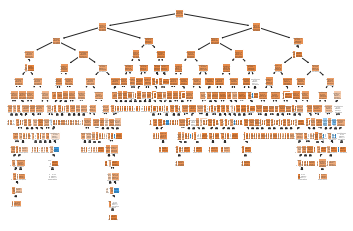

In [68]:
tree.plot_tree(dtclf2,
              feature_names=BPromo_feature_names,
              class_names=BPromo_target_names,
              filled = True)

In [70]:
DTX_train, DTX_test, DTY_train, DTY_test = train_test_split(DTDataX, DTDataY, test_size=0.3, random_state=42)

In [73]:
dtclf3 = tree.DecisionTreeClassifier()
dtclf3 = dtclf3.fit(DTX_train, DTY_train)

In [74]:
DTY_pred = dtclf3.predict(DTX_test)

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(DTY_test, DTY_pred)
print(confusion_matrix)

[[1191    8]
 [ 157    1]]


In [77]:
from sklearn.metrics import accuracy_score
print(accuracy_score(DTY_test, DTY_pred))

0.8784082535003684
